# Temperatur in Würzburg

In [1]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──



✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1



── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(lubridate)


Attaching package: ‘lubridate’




The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [3]:
theme_set(theme_light())

In [4]:
data <- read_csv("data/data_OBS_DEU_PT1H_T2M.csv")

Rows: 790288 Columns: 6



── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Produkt_Code
dbl  (3): SDO_ID, Wert, Qualitaet_Byte
dttm (1): Zeitstempel




ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [5]:
head(data)

Warning message:
“One or more parsing issues, see `problems()` for details”


Produkt_Code,SDO_ID,Zeitstempel,Wert,Qualitaet_Byte,Qualitaet_Niveau
<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>
OBS_DEU_PT1H_T2M,2600,2005-03-01 00:00:00,-12.4,4,3
OBS_DEU_PT1H_T2M,2600,2005-03-01 01:00:00,-12.6,6,10
OBS_DEU_PT1H_T2M,2600,2005-03-01 02:00:00,-13.1,1,10
OBS_DEU_PT1H_T2M,2600,2005-03-01 03:00:00,-13.7,1,10
OBS_DEU_PT1H_T2M,2600,2005-03-01 04:00:00,-14.4,1,10
OBS_DEU_PT1H_T2M,2600,2005-03-01 05:00:00,-14.9,1,10


In [6]:
station <- read_csv("data/sdo_OBS_DEU_PT1H_T2M.csv")

Rows: 2 Columns: 6



── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): SDO_Name, Metadata_Link
dbl (2): SDO_ID, Hoehe_ueber_NN




ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [7]:
station

SDO_ID,SDO_Name,Geogr_Laenge,Geogr_Breite,Hoehe_ueber_NN,Metadata_Link
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
5705,Würzburg,99576,497704,268,https://cdc.dwd.de/rest/metadata/station/html/812300016295
2600,Kitzingen,101781,497363,193,https://cdc.dwd.de/rest/metadata/station/html/812300321959


In [8]:
data <- data %>% mutate(SDO_ID = if_else(SDO_ID==2600, "Kitzingen", "Würzburg"))

**Diesesmal schauen wir uns nur Daten aus Würzburg an**

In [9]:
data <- data %>% filter(SDO_ID=="Würzburg")

# Fragestellungen

- Was und wann war die wärmste/kälteste Temperatur die je in Würzburg gemessen wurde?
- Wann war der wärmste/kälteste Tag/Woche/Monat/Jahr in Würzburg?
- Was war die extremste Temperaturdifferenz innerhalb von 24h?
- Gibt es einen langfristigen Trend in den Temperaturdaten über die Zeit?
- Gibt es einen Hinweis darauf, dass sich die Jahreszeiten verschieben?

## Wärmste/kälteste Temperatur

In [10]:
data %>% arrange(-Wert) %>% head

Produkt_Code,SDO_ID,Zeitstempel,Wert,Qualitaet_Byte,Qualitaet_Niveau
<chr>,<chr>,<dttm>,<dbl>,<dbl>,<dbl>
OBS_DEU_PT1H_T2M,Würzburg,2015-08-07 15:00:00,39.3,1,7
OBS_DEU_PT1H_T2M,Würzburg,2015-08-07 14:00:00,38.7,1,7
OBS_DEU_PT1H_T2M,Würzburg,2019-07-25 15:00:00,38.5,1,7
OBS_DEU_PT1H_T2M,Würzburg,2015-08-07 12:00:00,38.2,1,7
OBS_DEU_PT1H_T2M,Würzburg,2015-07-05 15:00:00,38.0,1,7
OBS_DEU_PT1H_T2M,Würzburg,2015-08-07 13:00:00,38.0,1,7


Die heißeste gemessene Temparatur in Würzburg gab es mit 39,3°C am 7. August 2015

In [11]:
data %>% arrange(Wert) %>% head

Produkt_Code,SDO_ID,Zeitstempel,Wert,Qualitaet_Byte,Qualitaet_Niveau
<chr>,<chr>,<dttm>,<dbl>,<dbl>,<dbl>
OBS_DEU_PT1H_T2M,Würzburg,1956-02-10 08:00:00,-23.4,0,5
OBS_DEU_PT1H_T2M,Würzburg,1956-02-10 07:00:00,-23.2,0,5
OBS_DEU_PT1H_T2M,Würzburg,1956-02-10 06:00:00,-23.1,0,5
OBS_DEU_PT1H_T2M,Würzburg,1956-02-10 05:00:00,-22.7,0,5
OBS_DEU_PT1H_T2M,Würzburg,1956-02-10 09:00:00,-22.6,0,5
OBS_DEU_PT1H_T2M,Würzburg,1956-02-10 04:00:00,-22.0,0,5


Die kälteste gemessene Temparatur in Würzburg gab es mit -23,4°C am 10. Februar 1956

## Wärmster/kältester Tag/Woche/Monat/Jahr

### Tag

In [12]:
data %>%
    mutate(tag = floor_date(Zeitstempel, unit="day")) %>%
    group_by(tag) %>%
    summarize(Wert=mean(Wert)) %>%
    arrange(-Wert) %>%
    head

tag,Wert
<dttm>,<dbl>
2015-08-07,30.33750
2019-07-25,30.22917
2015-07-04,30.08333
2019-07-26,29.79583
2003-08-13,29.18750
2015-07-05,29.02083


Der heißeste Tag war mit einer Tagesdurchschnittstemperatur von 30,3°C der 7. August 2015.

In [13]:
data %>%
    mutate(tag = floor_date(Zeitstempel, unit="day")) %>%
    group_by(tag) %>%
    summarize(Wert=mean(Wert)) %>%
    arrange(Wert) %>%
    head

tag,Wert
<dttm>,<dbl>
1956-02-01,-18.15833
1956-02-10,-16.99167
1985-01-08,-16.81667
1969-12-21,-16.77083
1968-01-13,-16.00833
1956-02-09,-15.61667


Der kälteste Tag war mit einer Tagesdurchschnittstemperatur von -18,2°C der 1. Februar 1956.

## Größte Temperaturdifferenz in 24h

### Erstmal innerhalb eines Tages (also von 0 bis 24Uhr)

In [14]:
data %>%
    mutate(tag = floor_date(Zeitstempel, unit="day")) %>%
    group_by(tag) %>%
    summarize(span=diff(range(Wert))) %>%
    arrange(-span) %>%
    head

tag,span
<dttm>,<dbl>
1968-01-14,24.9
1955-02-27,23.5
1962-09-03,23.4
1949-08-06,22.4
2003-05-05,22.4
1949-04-24,22.0


Am 14. Januar 1968 gab es innerhalb eines Tages einen Temperatur Unterschied von 24,9°C, wow!

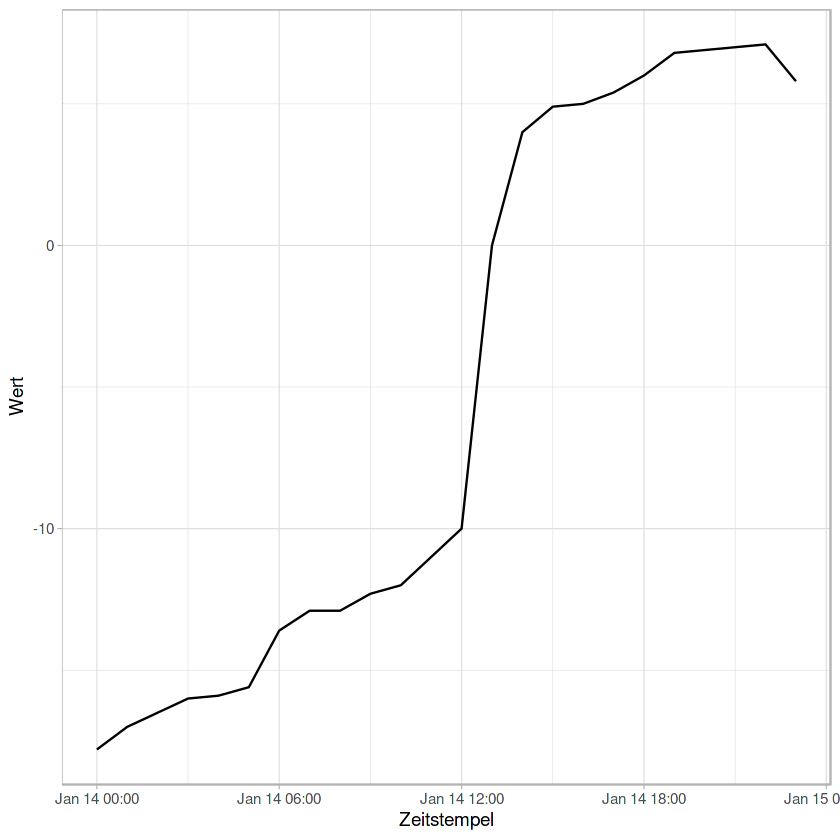

In [15]:
data %>% filter(year(Zeitstempel)==1968, month(Zeitstempel)==1, day(Zeitstempel)==14) %>% ggplot(aes(Zeitstempel, Wert)) + geom_line()

### Jetzt ordentlich in einem Sliding Window von 24h

In [18]:
library(slider)

In [38]:
data %>%
    mutate(span_last_24h = slide_index_dbl(Wert, Zeitstempel, ~diff(range(.x)), .before = lubridate::hours(23), .complete=TRUE)) %>%
    arrange(-span_last_24h)

Produkt_Code,SDO_ID,Zeitstempel,Wert,Qualitaet_Byte,Qualitaet_Niveau,span_last_24h
<chr>,<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>
OBS_DEU_PT1H_T2M,Würzburg,1979-01-01 06:00:00,-16.8,0,5,26.1
OBS_DEU_PT1H_T2M,Würzburg,1979-01-01 07:00:00,-16.4,0,5,26.1
OBS_DEU_PT1H_T2M,Würzburg,1979-01-01 08:00:00,-16.2,0,5,26.1
OBS_DEU_PT1H_T2M,Würzburg,1979-01-01 09:00:00,-16.2,0,5,25.9
OBS_DEU_PT1H_T2M,Würzburg,1979-01-01 10:00:00,-16.3,0,5,25.9
OBS_DEU_PT1H_T2M,Würzburg,1968-01-14 22:00:00,7.1,0,5,25.6
OBS_DEU_PT1H_T2M,Würzburg,1968-01-14 21:00:00,7.0,0,5,25.5
OBS_DEU_PT1H_T2M,Würzburg,1979-01-01 05:00:00,-16.2,0,5,25.5
OBS_DEU_PT1H_T2M,Würzburg,1968-01-14 20:00:00,6.9,0,5,25.4


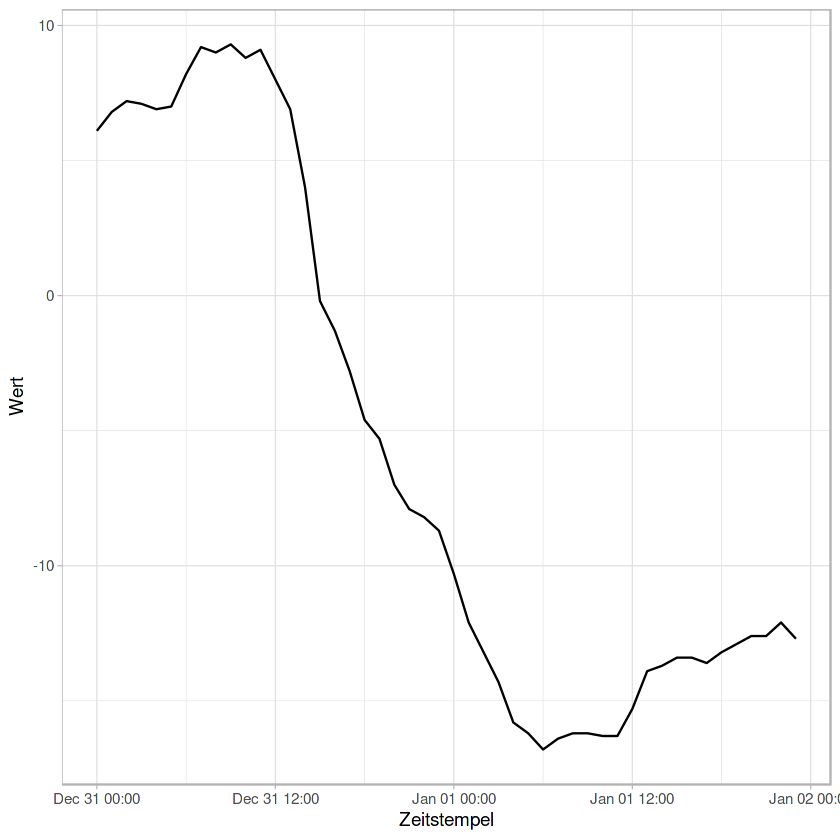

In [41]:
data %>% filter(Zeitstempel<ymd("1979-01-02"), Zeitstempel>=ymd("1978-12-31")) %>% ggplot(aes(Zeitstempel, Wert)) + geom_line()

Die größte Differenz gab es an Neujahr 1979 als die Temperatur über Nacht von fast 10°C um 26,1°C auf -16,8°C fiel. Dagegen ist die angeblich geringste Differenz innerhalb eines Tages am 10. September 2019 (0,0°C Schwankung) ein Artefakt auf Grund fehlender Daten.

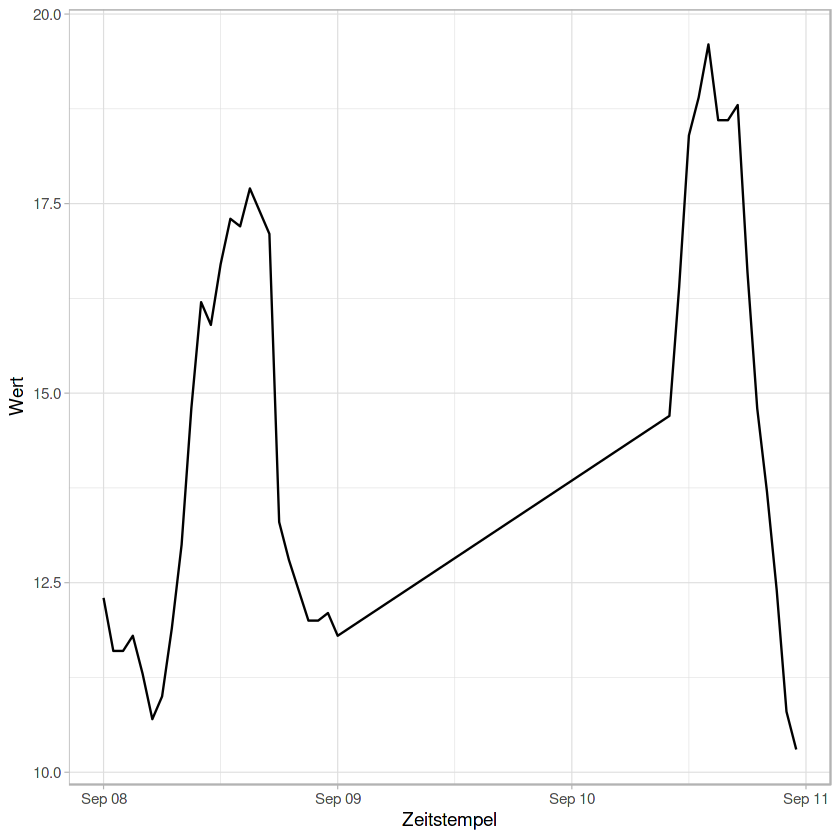

In [43]:
data %>% filter(Zeitstempel<ymd("2019-09-11"), Zeitstempel>=ymd("2019-09-08")) %>% ggplot(aes(Zeitstempel, Wert)) + geom_line()